In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import gzip
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
import torch
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import initializers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import utils
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as keras

In [2]:
#dataset reading code is used as taught in the tutorial
def read_image_data(file):
    with gzip.open(file, 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        image_count = int.from_bytes(f.read(4), 'big')
        row_count = int.from_bytes(f.read(4), 'big')
        column_count = int.from_bytes(f.read(4), 'big')
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        return images
def read_label_data(file):
    with gzip.open(file, 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        label_count = int.from_bytes(f.read(4), 'big')
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels
train_x = read_image_data("./data/mnist/train-images-idx3-ubyte.gz")
train_y = read_label_data("./data/mnist/train-labels-idx1-ubyte.gz")
test_x = read_image_data("./data/mnist/t10k-images-idx3-ubyte.gz")
test_y = read_label_data("./data/mnist/t10k-labels-idx1-ubyte.gz")

In [3]:
train_x_reshaped = train_x.reshape((train_x.shape[0], train_x.shape[1]*train_x.shape[2]))
test_x_reshaped = test_x.reshape((test_x.shape[0], test_x.shape[1]*test_x.shape[2]))

In [4]:
print(f"train_x : {train_x_reshaped.shape}")
print(f"test_x : {test_x_reshaped.shape}")
print(f"train_y : {train_y.shape}")
print(f"test_y : {test_y.shape}")

train_x : (60000, 784)
test_x : (10000, 784)
train_y : (60000,)
test_y : (10000,)


In [5]:
labels = np.unique(train_y)
print(f"Labels : {labels}")

Labels : [0 1 2 3 4 5 6 7 8 9]


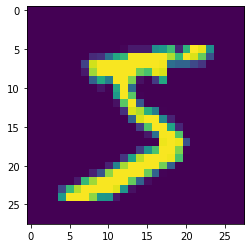

In [6]:
# Plotting and seeing the data
plt.imshow(train_x[0])
plt.show()

In [7]:
def compute_accuracy(y_true, y_pred):
    correct_classif = 0
    total = len(y_true)
    for i in range(total):
        if(y_true[i] == y_pred[i]):
            correct_classif += 1
    return correct_classif / total

In [8]:
encoder = Sequential()
encoder.add(layers.Dense(512, activation='relu'))
encoder.add(layers.Dense(128, activation='relu'))
encoder.add(layers.Dense(64, activation='relu'))

decoder = Sequential()
decoder.add(layers.Dense(128,activation='relu'))
decoder.add(layers.Dense(512, activation='relu'))
decoder.add(layers.Dense(784, activation='relu'))


In [9]:
model_input = layers.Input(shape=(784, ))
model_output = decoder(encoder(model_input))
ae_model = keras.Model(inputs=model_input, outputs=model_output)

In [10]:
ae_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 sequential (Sequential)     (None, 64)                475840    
                                                                 
 sequential_1 (Sequential)   (None, 784)               476560    
                                                                 
Total params: 952,400
Trainable params: 952,400
Non-trainable params: 0
_________________________________________________________________


In [11]:
adam_optim = optimizers.Adam(lr=0.001)

c:\Users\Samyak Jain\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
ae_model.compile(
  optimizer=adam_optim,
  loss='mse',
  metrics=['mean_squared_error'],
)

In [13]:
ae_model.fit(
    train_x_reshaped,
    train_x_reshaped,
    epochs=20,
    batch_size=32
)

Epoch 1/20
1875/1875 [==============================] - 17s 8ms/step - loss: 1569.5406 - mean_squared_error: 1569.5406
Epoch 2/20
1875/1875 [==============================] - 14s 8ms/step - loss: 1182.7777 - mean_squared_error: 1182.7777
Epoch 3/20
1875/1875 [==============================] - 14s 8ms/step - loss: 1041.2776 - mean_squared_error: 1041.2776 0s - loss: 1042.8865 - m
Epoch 4/20
1875/1875 [==============================] - 14s 8ms/step - loss: 980.0572 - mean_squared_error: 980.0572
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 958.3445 - mean_squared_error: 958.3445
Epoch 6/20
1875/1875 [==============================] - 14s 8ms/step - loss: 943.4130 - mean_squared_error: 943.4130
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 932.3978 - mean_squared_error: 932.3978 1s - loss: 9
Epoch 8/20
1875/1875 [==============================] - 14s 8ms/step - loss: 923.7673 - mean_squared_error: 923.7673 0s - loss: 924.1144 

In [14]:
encoded_imgs = encoder.predict(test_x_reshaped)
decoded_imgs = decoder.predict(encoded_imgs)

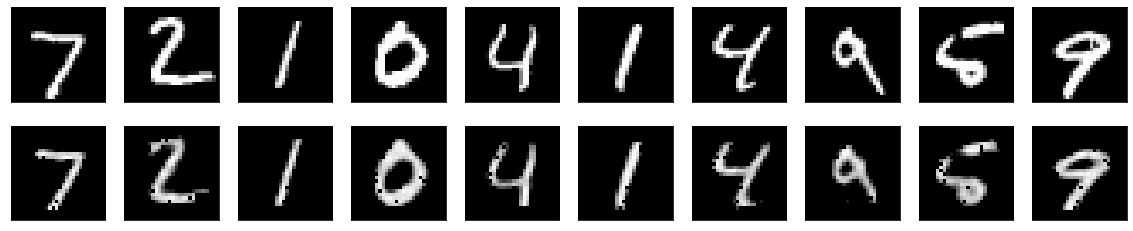

In [15]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_x_reshaped[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()